In [ ]:
!pip install lazypredict scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:


import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. Load dataset
# Set the correct path to your CSV file
# Example: "heart.csv" or "data/heart.csv"
df = pd.read_csv("/content/heart_disease_uci.csv")

# 3. Define target and features
target = "num"          # change if your target column has a different name
X = df.drop(columns=[target])
y = df[target]

# 4. Encode categorical variables to numeric
# This automatically converts text columns like 'sex', 'cp', 'thal', etc.
X = pd.get_dummies(X, drop_first=True)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6. Run LazyPredict classifier benchmark
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 7. Show model performance summary
print("=== LazyPredict model summary ===")
print(models)

# 8. Example: detailed report for one model (RandomForest)
if "RandomForestClassifier" in predictions.columns:
    print("\n=== Classification report: RandomForestClassifier ===")
    print(classification_report(y_test, predictions["RandomForestClassifier"]))
else:
    print("\nRandomForestClassifier not found in predictions columns.")


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 7
[LightGBM] [Info] Start training from score -0.805172
[LightGBM] [Info] Start training from score -1.244644
[LightGBM] [Info] Start training from score -2.135322
[LightGBM] [Info] Start training from score -2.146883
[LightGBM] [Info] Start training from score -3.510188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 1) Load
df = pd.read_csv("/content/heart_disease_uci.csv")

# 2) Target/features
target = "num"
X = df.drop(columns=[target])
y = df[target]

# 3) One-hot encode
X = pd.get_dummies(X, drop_first=True)

# 4) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5) Impute NaNs (fit on train, transform both)
imputer = SimpleImputer(strategy="median")  # good default for numeric after get_dummies
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# 6) SMOTE on TRAIN only
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train_imp, y_train)

# 7) LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_sm, X_test_imp, y_train_sm, y_test)

print("=== LazyPredict model summary (Imputer + SMOTE) ===")
print(models)

# 8) Report for RandomForest
if "RandomForestClassifier" in predictions.columns:
    print("\n=== Classification report: RandomForestClassifier (Imputer + SMOTE) ===")
    print(classification_report(y_test, predictions["RandomForestClassifier"]))
else:
    print("\nRandomForestClassifier not found in predictions columns.")


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2925
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 22
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
=== LazyPredict model summary (Imputer + SMOTE) ===
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.58               0.50    None      0.61   
SGDClassifier                      0.59               0.50    None      0.62   
Calibr

In [ ]:
# ============================================
# LazyPredict on Heart Disease CSV with Balancing
# ============================================

# 1. Install packages (run once)
# !pip install lazypredict scikit-learn pandas imbalanced-learn

import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# 2. Load dataset
df = pd.read_csv("/content/heart_disease_uci.csv")   # change to your CSV file name

# 3. Define target and features
target = "num"
X = df.drop(columns=[target])
y = df[target]

# 4. One‑hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# 5. Train/test split (keep original imbalance in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Oversample only the training data to balance classes
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 7. Run LazyPredict on the balanced training set
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_res, X_test, y_train_res, y_test)

print("=== LazyPredict model summary (balanced training) ===")
print(models)

# 8. Example detailed report for one model
if "RandomForestClassifier" in predictions.columns:
    print("\n=== Classification report: RandomForestClassifier ===")
    print(classification_report(y_test, predictions["RandomForestClassifier"]))
else:
    print("\nRandomForestClassifier not found in predictions columns.")


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 7
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
=== LazyPredict model summary (balanced training) ===
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  0.64               0.49    None      0.64   
QuadraticDi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Logistic Regression Evaluation Metrics:
  Accuracy: 0.5652
  Precision (Macro): 0.3618
  Recall (Macro): 0.3533
  F1-Score (Macro): 0.3417
Logistic Regression Confusion Matrix:
 [[66  9  0  0  0]
 [21 29  1  3  0]
 [ 4 12  2  7  0]
 [ 4 11  4  7  0]
 [ 0  2  0  2  0]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.78        75
           1       0.46      0.54      0.50        54
           2       0.29      0.08      0.12        25
           3       0.37      0.27      0.31        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.36      0.35      0.34       184
weighted avg       0.51      0.57      0.52       184

Random Forest Evaluation Metrics:
  Accuracy: 0.5652
  Precision (Macro): 0.4362
  Recall (Macro): 0.3991
  F1-Score (Macro): 0.4028
Random Forest Confusion Matrix:
 [[67  7  1  0  0]
 [19 27  4  2 

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:fbs: object, exang: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Logistic Regression Evaluation Metrics:
  Accuracy: 0.5207
  Precision (Macro): 0.5075
  Recall (Macro): 0.5148
  F1-Score (Macro): 0.5094
Logistic Regression Confusion Matrix:
 [[70  8  3  3  1]
 [22 35 12  7  5]
 [ 3  9 28 21 11]
 [ 5 14 15 29 21]
 [ 1  3 11 22 52]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        85
           1       0.51      0.43      0.47        81
           2       0.41      0.39      0.40        72
           3       0.35      0.35      0.35        84
           4       0.58      0.58      0.58        89

    accuracy                           0.52       411
   macro avg       0.51      0.51      0.51       411
weighted avg       0.51      0.52      0.51       411

Random Forest Evaluation Metrics:
  Accuracy: 0.8467
  Precision (Macro): 0.8435
  Recall (Macro): 0.8448
  F1-Score (Macro): 0.8414
Random Forest Confusion Matrix:
 [[73  5  4  3  0]
 [15 51  9  6 

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:fbs: object, exang: object

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()

# Apply to all relevant categorical columns (e.g. 'fbs' and 'exang')
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Convert other categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Logistic Regression Evaluation Metrics:
  Accuracy: 0.5328
  Precision (Macro): 0.5165
  Recall (Macro): 0.5253
  F1-Score (Macro): 0.5190
Logistic Regression Confusion Matrix:
 [[68  9  4  4  0]
 [20 34 15  7  5]
 [ 4  9 27 19 13]
 [ 4 12 16 31 21]
 [ 2  5  9 14 59]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        85
           1       0.49      0.42      0.45        81
           2       0.38      0.38      0.38        72
           3       0.41      0.37      0.39        84
           4       0.60      0.66      0.63        89

    accuracy                           0.53       411
   macro avg       0.52      0.53      0.52       411
weighted avg       0.52      0.53      0.53       411

Random Forest Evaluation Metrics:
  Accuracy: 0.8491
  Precision (Macro): 0.8473
  Recall (Macro): 0.8478
  F1-Score (Macro): 0.8456
Random Forest Confusion Matrix:
 [[73  7  3  2  0]
 [13 55  9  4 

ValueError: Negative values in data passed to MultinomialNB (input X).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()

# Apply to all relevant categorical columns (e.g. 'fbs' and 'exang')
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Convert other categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Clip negative values to 0 for MultinomialNB compatibility
X_resampled = X_resampled.clip(lower=0)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Logistic Regression Evaluation Metrics:
  Accuracy: 0.5401
  Precision (Macro): 0.5239
  Recall (Macro): 0.5320
  F1-Score (Macro): 0.5266
Logistic Regression Confusion Matrix:
 [[67 10  5  3  0]
 [20 34 16  7  4]
 [ 3 11 26 18 14]
 [ 4 13 13 35 19]
 [ 2  6  9 12 60]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        85
           1       0.46      0.42      0.44        81
           2       0.38      0.36      0.37        72
           3       0.47      0.42      0.44        84
           4       0.62      0.67      0.65        89

    accuracy                           0.54       411
   macro avg       0.52      0.53      0.53       411
weighted avg       0.53      0.54      0.53       411

Random Forest Evaluation Metrics:
  Accuracy: 0.8345
  Precision (Macro): 0.8306
  Recall (Macro): 0.8320
  F1-Score (Macro): 0.8278
Random Forest Confusion Matrix:
 [[73  6  6  0  0]
 [14 48 11  8 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting a node
}

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Evaluate the tuned model on the test data
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest test accuracy:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.7895600118615168
Random Forest test accuracy: 0.8321167883211679


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.001, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Apply GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

# Evaluate the tuned model on the test data
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost test accuracy:", accuracy_score(y_test, y_pred_xgb))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best score for XGBoost: 0.7889298687819706
XGBoost test accuracy: 0.8467153284671532


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Hyperparameter tuning for each model using GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.0001, 0.01, 0.1, 10, 20],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2', None]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9]
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Hyperparameter tuning and evaluation
for name, clf in classifiers.items():
    print(f"Hyperparameter tuning for {name}...")

    param_grid = param_grids.get(name, None)

    # If no specific grid is defined, skip tuning for this model
    if param_grid is None:
        print(f"Skipping hyperparameter tuning for {name}.")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores[name] = accuracy
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrices[name] = conf_matrix
        continue

    # Apply GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Use the best model to predict and evaluate
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Hyperparameter tuning for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.5747563890421032
Logistic Regression Evaluation Metrics:
  Accuracy: 0.5163
  Precision (Macro): 0.2696
  Recall (Macro): 0.2903
  F1-Score (Macro): 0.2583
Logistic Regression Confusion Matrix:
 [[67  8  0  0  0]
 [26 26  1  1  0]
 [ 5 19  0  1  0]
 [ 7 14  3  2  0]
 [ 1  1  0  2  0]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74        75
           1       0.38      0.48      0.43        54
           2       0.00      0.00      0.00        25
           3       0.33      0.08      0.12        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.27      0.29      0.26       184
weighted avg       0.42      0.52      0.44       184

Hyperparameter tuni

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 407, in pandas_feature_info
    new_feature_types.append(_pandas_dtype_mapper[dtype.name])
                             ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'object'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1787, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 702, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1257, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1768, in __init__
    self._init(
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 1832, in _init
    it.reraise()
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 617, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 598, in _handle_exception
    return fn()
           ^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 685, in <lambda>
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
                                              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1632, in next
    input_data(**self.kwargs)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 774, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 665, in input_data
    new, feature_names, feature_types = _proxy_transform(
                                        ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 1685, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 662, in _transform_pandas_df
    feature_names, feature_types = pandas_feature_info(
                                   ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 409, in pandas_feature_info
    _invalid_dataframe_dtype(data)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/data.py", line 372, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:fbs: object, exang: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = '/content/heart_disease_uci.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Hyperparameter tuning for each model using GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2', None]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9]
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Hyperparameter tuning and evaluation
for name, clf in classifiers.items():
    print(f"\nHyperparameter tuning for {name}...")

    param_grid = param_grids.get(name, None)

    # If no specific grid is defined, skip tuning for this model
    if param_grid is None:
        print(f"Skipping hyperparameter tuning for {name}.")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores[name] = accuracy
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrices[name] = conf_matrix
        continue

    # Apply GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}")

    # Use the best model to predict and evaluate
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)



Hyperparameter tuning for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.5747563890421032
Logistic Regression Evaluation Metrics:
  Accuracy: 0.5163
  Precision (Macro): 0.2696
  Recall (Macro): 0.2903
  F1-Score (Macro): 0.2583
Logistic Regression Confusion Matrix:
 [[67  8  0  0  0]
 [26 26  1  1  0]
 [ 5 19  0  1  0]
 [ 7 14  3  2  0]
 [ 1  1  0  2  0]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74        75
           1       0.38      0.48      0.43        54
           2       0.00      0.00      0.00        25
           3       0.33      0.08      0.12        26
           4       0.00      0.00      0.00         4

    accuracy                           0.52       184
   macro avg       0.27      0.29      0.26       184
weighted avg       0.42      0.52      0.44       184


Hyperparameter tu

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Load dataset
file_path = '/content/heart_disease_uci.csv'  # Adjust path as needed
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Logistic Regression: {best_params}")
print(f"Best cross-validation score for Logistic Regression: {best_score}")

# Use the best model to predict and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print(f"Logistic Regression Evaluation Metrics:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision (Macro): {precision_macro:.4f}")
print(f"  Recall (Macro): {recall_macro:.4f}")
print(f"  F1-Score (Macro): {f1_macro:.4f}")
print(f"Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print the final accuracy score
print(f"\nFinal Accuracy Score: {accuracy:.4f}")


Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.5829012686155542
Logistic Regression Evaluation Metrics:
  Accuracy: 0.5652
  Precision (Macro): 0.4150
  Recall (Macro): 0.3572
  F1-Score (Macro): 0.3486
Confusion Matrix:
 [[66  9  0  0  0]
 [24 28  0  2  0]
 [ 4 13  2  6  0]
 [ 4 12  2  8  0]
 [ 1  2  0  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76        75
           1       0.44      0.52      0.47        54
           2       0.50      0.08      0.14        25
           3       0.47      0.31      0.37        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.41      0.36      0.35       184
weighted avg       0.53      0.57      0.52       184


Final Accuracy Score: 0.5652


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()

# Apply to all relevant categorical columns (e.g. 'fbs' and 'exang')
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Convert other categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Transform target column to binary (0 = no heart disease, 1 = has heart disease)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Clip negative values to 0 for MultinomialNB compatibility
X_resampled = X_resampled.clip(lower=0)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define classifiers for evaluation
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', C=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ], voting='hard')
}

# Store evaluation metrics
scores = {}
conf_matrices = {}

# Evaluate each model
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Store scores and confusion matrices
    scores[name] = accuracy
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = conf_matrix

    # Print evaluation metrics
    print(f"{name} Evaluation Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision_macro:.4f}")
    print(f"  Recall (Macro): {recall_macro:.4f}")
    print(f"  F1-Score (Macro): {f1_macro:.4f}")
    print(f"{name} Confusion Matrix:\n", conf_matrix)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, print final scores
print("\nFinal Scores:", scores)


Logistic Regression Evaluation Metrics:
  Accuracy: 0.8186
  Precision (Macro): 0.8251
  Recall (Macro): 0.8235
  F1-Score (Macro): 0.8186
Logistic Regression Confusion Matrix:
 [[85 10]
 [27 82]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        95
           1       0.89      0.75      0.82       109

    accuracy                           0.82       204
   macro avg       0.83      0.82      0.82       204
weighted avg       0.83      0.82      0.82       204

Random Forest Evaluation Metrics:
  Accuracy: 0.8382
  Precision (Macro): 0.8414
  Recall (Macro): 0.8419
  F1-Score (Macro): 0.8382
Random Forest Confusion Matrix:
 [[85 10]
 [23 86]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        95
           1       0.90      0.79      0.84       109

    accuracy                           0.84  

**Best**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, VotingClassifier,
                             StackingClassifier)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score,
                            accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Convert other categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Transform target column to binary
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset BEFORE applying SMOTE (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling - Important for SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# For Naive Bayes, we need non-negative values
X_train_nb = X_train_resampled.clip(lower=0)
X_test_nb = X_test.clip(lower=0)

# Define hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [1000]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
}

# Base classifiers
base_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Store evaluation metrics
scores = {}
best_models = {}
conf_matrices = {}

print("=" * 80)
print("PHASE 1: HYPERPARAMETER TUNING FOR BASE MODELS")
print("=" * 80)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for each model
for name, clf in base_classifiers.items():
    print(f"\nTuning {name}...")

    # Choose appropriate data (scaled or not)
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train_resampled
        X_test_use = X_test

    if name in param_grids:
        # Perform GridSearchCV with reduced parameter combinations for faster execution
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_use, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
    else:
        # No tuning for this model
        best_model = clf
        best_model.fit(X_train_use, y_train_resampled)

    # Store the best model
    best_models[name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test_use)
    y_pred_proba = best_model.predict_proba(X_test_use)[:, 1] if hasattr(best_model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    scores[name] = {
        'accuracy': accuracy,
        'precision': precision_macro,
        'recall': recall_macro,
        'f1': f1_macro,
        'roc_auc': roc_auc
    }

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Test Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision_macro:.4f}")
    print(f"  Recall: {recall_macro:.4f}")
    print(f"  F1-Score: {f1_macro:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")

print("\n" + "=" * 80)
print("PHASE 2: ENSEMBLE METHODS")
print("=" * 80)

# Naive Bayes (using Gaussian instead of Multinomial for better performance)
print("\nTraining Gaussian Naive Bayes...")
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train_resampled)
y_pred_nb = nb_clf.predict(X_test_scaled)
y_pred_proba_nb = nb_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

scores['Gaussian Naive Bayes'] = {
    'accuracy': accuracy_nb,
    'precision': precision_nb,
    'recall': recall_nb,
    'f1': f1_nb,
    'roc_auc': roc_auc_nb
}

print(f"\nGaussian Naive Bayes Test Results:")
print(f"  Accuracy: {accuracy_nb:.4f}")
print(f"  Precision: {precision_nb:.4f}")
print(f"  Recall: {recall_nb:.4f}")
print(f"  F1-Score: {f1_nb:.4f}")
print(f"  ROC-AUC: {roc_auc_nb:.4f}")

# AdaBoost with tuned base estimator
print("\nTraining AdaBoost...")
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_clf.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada_clf.predict(X_test)
y_pred_proba_ada = ada_clf.predict_proba(X_test)[:, 1]

accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='macro')
recall_ada = recall_score(y_test, y_pred_ada, average='macro')
f1_ada = f1_score(y_test, y_pred_ada, average='macro')
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

scores['AdaBoost'] = {
    'accuracy': accuracy_ada,
    'precision': precision_ada,
    'recall': recall_ada,
    'f1': f1_ada,
    'roc_auc': roc_auc_ada
}

print(f"\nAdaBoost Test Results:")
print(f"  Accuracy: {accuracy_ada:.4f}")
print(f"  Precision: {precision_ada:.4f}")
print(f"  Recall: {recall_ada:.4f}")
print(f"  F1-Score: {f1_ada:.4f}")
print(f"  ROC-AUC: {roc_auc_ada:.4f}")

# Voting Classifier with best models
print("\nTraining Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_models['Logistic Regression']),
        ('rf', best_models['Random Forest']),
        ('xgb', best_models['XGBoost']),
        ('gb', best_models['Gradient Boosting'])
    ],
    voting='soft',  # Use soft voting for probability-based voting
    weights=[2, 2, 2, 2]  # Equal weights, can be tuned
)
voting_clf.fit(X_train_scaled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='macro')
recall_voting = recall_score(y_test, y_pred_voting, average='macro')
f1_voting = f1_score(y_test, y_pred_voting, average='macro')
roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

scores['Voting Classifier'] = {
    'accuracy': accuracy_voting,
    'precision': precision_voting,
    'recall': recall_voting,
    'f1': f1_voting,
    'roc_auc': roc_auc_voting
}

print(f"\nVoting Classifier Test Results:")
print(f"  Accuracy: {accuracy_voting:.4f}")
print(f"  Precision: {precision_voting:.4f}")
print(f"  Recall: {recall_voting:.4f}")
print(f"  F1-Score: {f1_voting:.4f}")
print(f"  ROC-AUC: {roc_auc_voting:.4f}")

# Stacking Classifier
print("\nTraining Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_models['Logistic Regression']),
        ('rf', best_models['Random Forest']),
        ('xgb', best_models['XGBoost']),
        ('gb', best_models['Gradient Boosting']),
        ('svm', best_models['SVM'])
    ],
    final_estimator=LogisticRegression(max_iter=1000, C=10),
    cv=skf,
    stack_method='predict_proba'
)
stacking_clf.fit(X_train_scaled, y_train_resampled)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average='macro')
recall_stacking = recall_score(y_test, y_pred_stacking, average='macro')
f1_stacking = f1_score(y_test, y_pred_stacking, average='macro')
roc_auc_stacking = roc_auc_score(y_test, y_pred_proba_stacking)

scores['Stacking Classifier'] = {
    'accuracy': accuracy_stacking,
    'precision': precision_stacking,
    'recall': recall_stacking,
    'f1': f1_stacking,
    'roc_auc': roc_auc_stacking
}

print(f"\nStacking Classifier Test Results:")
print(f"  Accuracy: {accuracy_stacking:.4f}")
print(f"  Precision: {precision_stacking:.4f}")
print(f"  Recall: {recall_stacking:.4f}")
print(f"  F1-Score: {f1_stacking:.4f}")
print(f"  ROC-AUC: {roc_auc_stacking:.4f}")

print("\n" + "=" * 80)
print("FINAL RESULTS SUMMARY")
print("=" * 80)

# Create results dataframe
results_df = pd.DataFrame(scores).T
results_df = results_df.sort_values('accuracy', ascending=False)

print("\nModel Performance Comparison:")
print(results_df.to_string())

print(f"\n\nBest Model: {results_df.index[0]}")
print(f"Best Accuracy: {results_df['accuracy'].iloc[0]:.4f}")
print(f"Best F1-Score: {results_df['f1'].iloc[0]:.4f}")
print(f"Best ROC-AUC: {results_df['roc_auc'].iloc[0]:.4f}")

# Detailed report for best model
best_model_name = results_df.index[0]
print(f"\n\nDetailed Classification Report for {best_model_name}:")

if best_model_name == 'Stacking Classifier':
    y_pred_best = y_pred_stacking
elif best_model_name == 'Voting Classifier':
    y_pred_best = y_pred_voting
elif best_model_name == 'AdaBoost':
    y_pred_best = y_pred_ada
elif best_model_name == 'Gaussian Naive Bayes':
    y_pred_best = y_pred_nb
else:
    # For tuned base models
    if best_model_name in ['Logistic Regression', 'SVM', 'KNN']:
        y_pred_best = best_models[best_model_name].predict(X_test_scaled)
    else:
        y_pred_best = best_models[best_model_name].predict(X_test)

print(classification_report(y_test, y_pred_best,
                          target_names=['No Disease', 'Heart Disease']))
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}")


PHASE 1: HYPERPARAMETER TUNING FOR BASE MODELS

Tuning Logistic Regression...
Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8219

Logistic Regression Test Results:
  Accuracy: 0.8424
  Precision: 0.8415
  Recall: 0.8387
  F1-Score: 0.8399
  ROC-AUC: 0.9082

Tuning Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8341

Random Forest Test Results:
  Accuracy: 0.8370
  Precision: 0.8377
  Recall: 0.8314
  F1-Score: 0.8336
  ROC-AUC: 0.9200

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best CV score: 0.8341

Gradient Boosting Test Results:
  Accuracy: 0.8424
  Precision: 0.8426
  Recall: 0.8375
  F1-Score: 0.8394
  ROC-AUC: 0.9009

Tuning XGBoost...
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best CV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, VotingClassifier,
                             StackingClassifier)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score,
                            accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

# Convert other categorical columns to dummy variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

# Transform target column to binary
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define feature columns and target column
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# Split the dataset BEFORE applying SMOTE (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling - Important for SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# For Naive Bayes, we need non-negative values
X_train_nb = X_train_resampled.clip(lower=0)
X_test_nb = X_test.clip(lower=0)

# Define hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [1000]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 63, 127],
        'max_depth': [5, 10, 20],
        'boosting_type': ['gbdt', 'dart'],
    }
}

# Base classifiers
base_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Store evaluation metrics
scores = {}
best_models = {}
conf_matrices = {}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for each model
for name, clf in base_classifiers.items():
    print(f"\nTuning {name}...")

    # Choose appropriate data (scaled or not)
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train_resampled
        X_test_use = X_test

    if name in param_grids:
        # Perform GridSearchCV
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_use, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
    else:
        # No tuning for this model
        best_model = clf
        best_model.fit(X_train_use, y_train_resampled)

    # Store the best model
    best_models[name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test_use)
    y_pred_proba = best_model.predict_proba(X_test_use)[:, 1] if hasattr(best_model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    scores[name] = {
        'accuracy': accuracy,
        'precision': precision_macro,
        'recall': recall_macro,
        'f1': f1_macro,
        'roc_auc': roc_auc
    }

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Test Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision_macro:.4f}")
    print(f"  Recall: {recall_macro:.4f}")
    print(f"  F1-Score: {f1_macro:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")



Tuning Logistic Regression...
Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8219

Logistic Regression Test Results:
  Accuracy: 0.8424
  Precision: 0.8415
  Recall: 0.8387
  F1-Score: 0.8399
  ROC-AUC: 0.9082

Tuning Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8341

Random Forest Test Results:
  Accuracy: 0.8370
  Precision: 0.8377
  Recall: 0.8314
  F1-Score: 0.8336
  ROC-AUC: 0.9200

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best CV score: 0.8341

Gradient Boosting Test Results:
  Accuracy: 0.8424
  Precision: 0.8426
  Recall: 0.8375
  F1-Score: 0.8394
  ROC-AUC: 0.9009

Tuning XGBoost...
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best CV score: 0.8317

XGBoost Test Results:
  Accurac

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, VotingClassifier,
                             StackingClassifier)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score,
                            accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# ==============================================================================

# Load dataset
file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

# Drop irrelevant columns
df = df.drop(columns=['id', 'dataset'])

# Handle missing values (Imputation)
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
# ca and thal often contain '?' and need robust imputation/encoding
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Replace '?' with NaN for imputation
df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute and Label Encode categorical columns (Robust method to handle ValueError: 2)
for col in categorical_columns:
    if col in df.columns:
        # 1. Impute using SimpleImputer (returns a 2D numpy array)
        imputed_array = categorical_imputer.fit_transform(df[[col]])

        # 2. Convert the imputed numpy array back to a 1D Pandas Series (ravel() flattens it)
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)

        # 3. Apply LabelEncoder
        le = LabelEncoder()
        # Convert to string first to ensure robust encoding
        df[col] = le.fit_transform(df[col].astype(str))

# Convert other categorical columns to dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)


# ==============================================================================
# 2. ফিচার ইঞ্জিনিয়ারিং (Feature Engineering - For Higher Accuracy)
# ==============================================================================

# RPP: Rate Pressure Product (Indicator of myocardial oxygen demand)
df['rate_pressure_product'] = df['thalch'] * df['trestbps']

# Chol/Age Ratio
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)

# Log transformation of oldpeak (helps normalize skewed data)
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))

# Clean Infs that might arise from ratios/logs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True) # Re-impute any new NaNs

# Transform target column to binary (0=No Disease, 1=Disease)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define feature columns and target column (updated to include new features)
feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'

# Prepare features (X) and target (y)
X = df[feature_columns_updated]
y = df[target_column]

# ==============================================================================
# 3. ডেটা স্প্লিট ও রিস্যাম্পলিং (Data Split and Resampling)
# ==============================================================================

# Split the dataset BEFORE applying SMOTE (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling - Crucial for SVM, KNN, and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# ==============================================================================
# 4. মডেল টিউনিং ও ট্রেনিং (Model Tuning and Training)
# ==============================================================================

# Define hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
    },
    # OPTIMIZED: Deeper XGBoost Grid
    'XGBoost': {
        'n_estimators': [150, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale', 0.01, 0.1]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Base classifiers
base_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
}

# Store evaluation metrics
scores = {}
best_models = {}

print("=" * 80)
print("PHASE 1: HYPERPARAMETER TUNING FOR BASE MODELS")
print("=" * 80)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV for each model
for name, clf in base_classifiers.items():
    print(f"\nTuning {name}...")

    # Choose appropriate data (scaled or not)
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train_resampled
        X_test_use = X_test

    if name in param_grids:
        grid_search = GridSearchCV(
            estimator=clf,
            param_grid=param_grids[name],
            cv=skf,
            scoring='roc_auc', # Optimization for ROC-AUC
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_use, y_train_resampled)
        best_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV ROC-AUC: {grid_search.best_score_:.4f}")
    else:
        best_model = clf
        best_model.fit(X_train_use, y_train_resampled)

    # Store the best model
    best_models[name] = best_model

    # Evaluate on test set
    y_pred = best_model.predict(X_test_use)
    y_pred_proba = best_model.predict_proba(X_test_use)[:, 1] if hasattr(best_model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    scores[name] = {
        'accuracy': accuracy,
        'f1_score': f1_macro,
        'roc_auc': roc_auc
    }

    print(f"  Accuracy: {accuracy:.4f} | F1-Score: {f1_macro:.4f} | ROC-AUC: {roc_auc:.4f}")


# ==============================================================================
# 5. এনসেম্বল পদ্ধতি (Ensemble Methods)
# ==============================================================================

print("\n" + "=" * 80)
print("PHASE 2: ADVANCED ENSEMBLE METHODS (Boosting, Voting, Stacking)")
print("=" * 80)

# Gaussian Naive Bayes (Requires scaled data)
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train_resampled)
y_pred_proba_nb = nb_clf.predict_proba(X_test_scaled)[:, 1]
scores['Gaussian Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_clf.predict(X_test_scaled)),
    'f1_score': f1_score(y_test, nb_clf.predict(X_test_scaled), average='macro'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_nb)
}
print(f"Gaussian Naive Bayes Result: Accuracy {scores['Gaussian Naive Bayes']['accuracy']:.4f}")


# Voting Classifier (Focus on high-performing, diverse models)
print("\nTraining Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_models['Logistic Regression']),
        ('svm', best_models['SVM']),
        ('rf', best_models['Random Forest']),
        ('xgb', best_models['XGBoost']),
    ],
    voting='soft',
    weights=[1, 1, 2, 2] # Custom weights for better ensemble balance
)

# Voting classifier needs consistent input features, using scaled features
voting_clf.fit(X_train_scaled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

scores['Voting Classifier'] = {
    'accuracy': accuracy_score(y_test, y_pred_voting),
    'f1_score': f1_score(y_test, y_pred_voting, average='macro'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_voting)
}
print(f"Voting Classifier Result: Accuracy {scores['Voting Classifier']['accuracy']:.4f}")


# Stacking Classifier (Meta-model: LogReg)
print("\nTraining Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_models['Logistic Regression']),
        ('xgb', best_models['XGBoost']),
        ('svm', best_models['SVM'])
    ],
    final_estimator=LogisticRegression(max_iter=1000, C=10), # Optimized meta-model
    cv=skf,
    stack_method='predict_proba'
)
# Stacking also uses scaled features
stacking_clf.fit(X_train_scaled, y_train_resampled)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test_scaled)[:, 1]

scores['Stacking Classifier'] = {
    'accuracy': accuracy_score(y_test, y_pred_stacking),
    'f1_score': f1_score(y_test, y_pred_stacking, average='macro'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_stacking)
}
print(f"Stacking Classifier Result: Accuracy {scores['Stacking Classifier']['accuracy']:.4f}")


# ==============================================================================
# 6. ফাইনাল রেজাল্ট ও রিপোর্ট (Final Results and Report)
# ==============================================================================

print("\n" + "=" * 80)
print("FINAL RESULTS SUMMARY")
print("=" * 80)

# Create results dataframe
results_df = pd.DataFrame(scores).T
results_df = results_df.sort_values('accuracy', ascending=False)

print("\nModel Performance Comparison (Sorted by Accuracy):")
print(results_df.to_string(float_format='%.4f'))

# Detailed report for best model
best_model_name = results_df.index[0]
best_accuracy = results_df['accuracy'].iloc[0]

print(f"\n\n🏆 Best Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")

# Determine the prediction array for the best model
if best_model_name == 'Stacking Classifier':
    y_pred_best = y_pred_stacking
elif best_model_name == 'Voting Classifier':
    y_pred_best = y_pred_voting
elif best_model_name == 'Gaussian Naive Bayes':
    y_pred_best = nb_clf.predict(X_test_scaled)
else:
    # For tuned base models
    if best_model_name in ['Logistic Regression', 'SVM', 'KNN']:
        y_pred_best = best_models[best_model_name].predict(X_test_scaled)
    else:
        y_pred_best = best_models[best_model_name].predict(X_test)


print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best,
                          target_names=['No Disease', 'Heart Disease']))
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}")

PHASE 1: HYPERPARAMETER TUNING FOR BASE MODELS

Tuning Logistic Regression...
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC-AUC: 0.8911
  Accuracy: 0.8207 | F1-Score: 0.8183 | ROC-AUC: 0.8923

Tuning Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best CV ROC-AUC: 0.8982
  Accuracy: 0.8370 | F1-Score: 0.8341 | ROC-AUC: 0.9119

Tuning Gradient Boosting...
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV ROC-AUC: 0.9042
  Accuracy: 0.8478 | F1-Score: 0.8460 | ROC-AUC: 0.9150

Tuning XGBoost...
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 10, 'subsample': 0.8}
Best CV ROC-AUC: 0.9056
  Accuracy: 0.8478 | F1-Score: 0.8456 | ROC-AUC: 0.9219

Tuning SVM...
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV ROC-AUC: 0.9015
  Accuracy: 0.8587 | F1-Score: 0.8562 | ROC-AUC: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, PowerTransformer # PowerTransformer for better performance
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# ==============================================================================

file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

df = df.drop(columns=['id', 'dataset'])
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Robust Impute and Label Encode categorical columns
for col in categorical_columns:
    if col in df.columns:
        imputed_array = categorical_imputer.fit_transform(df[[col]])
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)


# ==============================================================================
# 2. ফিচার ইঞ্জিনিয়ারিং (Feature Engineering)
# ==============================================================================

# RPP: Rate Pressure Product
df['rate_pressure_product'] = df['thalch'] * df['trestbps']

# Chol/Age Ratio
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)

# Log transformation of oldpeak
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Target: Convert to binary
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'
X = df[feature_columns_updated]
y = df[target_column]

# ==============================================================================
# 3. ডেটা স্প্লিট, রিস্যাম্পলিং ও স্কেলিং (Data Split, Resampling and Scaling)
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PowerTransformer for optimal KNN performance
scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# ==============================================================================
# 4. KNN মডেল টিউনিং ও মূল্যায়ন (KNN Model Tuning and Evaluation)
# ==============================================================================

# OPTIMIZED: Deeper Grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Wider K range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Additional metric
}

knn_clf = KNeighborsClassifier()

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN) MODEL TUNING & EVALUATION")
print("=" * 60)

print("\nTuning KNN Classifier using ROC-AUC...")
knn_grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_param_grid,
    cv=skf,
    scoring='roc_auc', # Optimization for ROC-AUC
    n_jobs=-1,
    verbose=1
)

# Train the model on scaled and resampled training data
knn_grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
best_knn_model = knn_grid_search.best_estimator_

# Evaluate on test set
X_test_use = X_test_scaled
y_pred_knn = best_knn_model.predict(X_test_use)
y_pred_proba_knn = best_knn_model.predict_proba(X_test_use)[:, 1]

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nBest KNN Parameters: {knn_grid_search.best_params_}")
print(f"Best CV ROC-AUC Score: {knn_grid_search.best_score_:.4f}")

print("\n--- Final KNN Test Results ---")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  ROC-AUC:  {roc_auc_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn,
                          target_names=['No Disease', 'Heart Disease']))
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")

K-NEAREST NEIGHBORS (KNN) MODEL TUNING & EVALUATION

Tuning KNN Classifier using ROC-AUC...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best CV ROC-AUC Score: 0.9037

--- Final KNN Test Results ---
  Accuracy: 0.8587
  ROC-AUC:  0.9113

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.85      0.83      0.84        82
Heart Disease       0.87      0.88      0.87       102

     accuracy                           0.86       184
    macro avg       0.86      0.86      0.86       184
 weighted avg       0.86      0.86      0.86       184


Confusion Matrix:
[[68 14]
 [12 90]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, PowerTransformer # PowerTransformer for better performance
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# ==============================================================================

file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

df = df.drop(columns=['id', 'dataset'])
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Robust Impute and Label Encode categorical columns
for col in categorical_columns:
    if col in df.columns:
        imputed_array = categorical_imputer.fit_transform(df[[col]])
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# One-Hot Encoding for remaining categorical features
df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)


# ==============================================================================
# 2. ফিচার ইঞ্জিনিয়ারিং (Feature Engineering)
# ==============================================================================

# RPP: Rate Pressure Product
df['rate_pressure_product'] = df['thalch'] * df['trestbps']

# Chol/Age Ratio
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)

# Log transformation of oldpeak
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))

# NEW FEATURE: Heart Rate Max / Age Ratio
df['thalch_age_ratio'] = df['thalch'] / df['age']

# --- ROBUST FIX FOR 'cp_2' KEY ERROR ---
# NEW FEATURE: High Risk Chest Pain Indicator
high_risk_cp_cols = [col for col in df.columns if col.startswith('cp_') and col not in ['cp_1', 'cp_1.0']]
if high_risk_cp_cols:
    df['is_high_risk_cp'] = df[high_risk_cp_cols].sum(axis=1)
    print(f"Successfully created 'is_high_risk_cp' using columns: {high_risk_cp_cols}")
else:
    # Fallback if OHE columns are inconsistent
    df['is_high_risk_cp'] = 0
    print("Warning: Could not identify high-risk 'cp' columns for feature engineering. Using placeholder.")
# --- END ROBUST FIX ---

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Target: Convert to binary
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

feature_columns_updated = [col for col in df.columns if col != 'num']
target_column = 'num'
X = df[feature_columns_updated]
y = df[target_column]

# ==============================================================================
# 3. ডেটা স্প্লিট, রিস্যাম্পলিং ও স্কেলিং (Data Split, Resampling and Scaling)
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PowerTransformer for optimal KNN performance
scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# ==============================================================================
# 4. KNN মডেল টিউনিং ও মূল্যায়ন (KNN Model Tuning and Evaluation)
# ==============================================================================

# OPTIMIZED: Deeper Grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3] # Generalizing Minkowski distance
}

knn_clf = KNeighborsClassifier()

# Stratified K-Fold Cross-Validation (Inner loop for GridSearchCV)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 60)
print("K-NEAREST NEIGHBORS (KNN) MODEL TUNING & EVALUATION")
print("=" * 60)

print("\nTuning KNN Classifier using ROC-AUC...")
knn_grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_param_grid,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Train the model
knn_grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best model
best_knn_model = knn_grid_search.best_estimator_

# Evaluate on test set
X_test_use = X_test_scaled
y_pred_knn = best_knn_model.predict(X_test_use)
y_pred_proba_knn = best_knn_model.predict_proba(X_test_use)[:, 1]

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nBest KNN Parameters: {knn_grid_search.best_params_}")
print(f"Best CV ROC-AUC Score: {knn_grid_search.best_score_:.4f}")

print("\n--- Final KNN Test Results ---")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  ROC-AUC:  {roc_auc_knn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn,
                          target_names=['No Disease', 'Heart Disease']))
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")

# ==============================================================================
# 5. স্থিতিশীলতা মূল্যায়ন (Optional: Stability Check using Cross-Validation)
# ==============================================================================

print("\n" + "=" * 60)
print("STABILITY CHECK (10-Fold Cross-Validation on Full Data)")
print("=" * 60)

X_full_scaled = scaler.fit_transform(X) # Scale the full feature set
cv_scores = cross_val_score(best_knn_model, X_full_scaled, y, cv=10, scoring='accuracy', n_jobs=-1)

print(f"10-Fold CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev of CV Accuracy: {cv_scores.std():.4f}")

Successfully created 'is_high_risk_cp' using columns: ['cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
K-NEAREST NEIGHBORS (KNN) MODEL TUNING & EVALUATION

Tuning KNN Classifier using ROC-AUC...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best CV ROC-AUC Score: 0.9024

--- Final KNN Test Results ---
  Accuracy: 0.8587
  ROC-AUC:  0.9231

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.84      0.84      0.84        82
Heart Disease       0.87      0.87      0.87       102

     accuracy                           0.86       184
    macro avg       0.86      0.86      0.86       184
 weighted avg       0.86      0.86      0.86       184


Confusion Matrix:
[[69 13]
 [13 89]]

STABILITY CHECK (10-Fold Cross-Validation on Full Data)
10-Fold CV Accuracy Scores: [0.83695652 0.81521739 0.73913043 0.68478261 0.902173

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# --- পূর্বের ডেটা লোডিং, প্রি-প্রসেসিং, ফিচার ইঞ্জিনিয়ারিং এবং স্কেলিং কোড ---
# আপনার পূর্বের সফল কোড থেকে X, y, scaler এবং best_knn_model ধরে নেওয়া হয়েছে।
# নিচে শুধুমাত্র কাস্টম CV রিপোর্টিং-এর জন্য প্রয়োজনীয় অংশগুলি দেওয়া হলো।

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# [Previous code from step 1, 2, 3 should be placed here to define X, y, and scaler]
# ==============================================================================

# (Replacing the omitted data loading/preprocessing/splitting code block for completeness)
file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

df = df.drop(columns=['id', 'dataset'])
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

for col in categorical_columns:
    if col in df.columns:
        imputed_array = categorical_imputer.fit_transform(df[[col]])
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)

df['rate_pressure_product'] = df['thalch'] * df['trestbps']
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))
df['thalch_age_ratio'] = df['thalch'] / df['age']

high_risk_cp_cols = [col for col in df.columns if col.startswith('cp_') and col not in ['cp_1', 'cp_1.0']]
if high_risk_cp_cols:
    df['is_high_risk_cp'] = df[high_risk_cp_cols].sum(axis=1)
    print(f"Successfully created 'is_high_risk_cp' using columns: {high_risk_cp_cols}")
else:
    df['is_high_risk_cp'] = 0
    print("Warning: Could not identify high-risk 'cp' columns for feature engineering. Using placeholder.")

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

feature_columns_updated = [col for col in df.columns if col != 'num']
X = df[feature_columns_updated]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_full_scaled = scaler.fit_transform(X)


# --- Assume best_knn_model is the model trained from the previous step ---
# (Using the best parameters you found in the last step for consistency)
best_knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1, weights='distance')

# We re-fit the model on the full scaled training data to ensure it's up-to-date
best_knn_model.fit(X_train_scaled, y_train_resampled)
# ==============================================================================


# ==============================================================================
# 5. কাস্টম স্ট্যাবিলিটি চেক (CUSTOM STABILITY CHECK - Class-wise Report)
# ==============================================================================

print("\n" + "=" * 80)
print("CUSTOM STABILITY CHECK (10-Fold CV with Class-wise Metrics)")
print("=" * 80)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []
fold_accuracies = []
fold_roc_aucs = []
fold_count = 0

# Split the FULL SCALED DATA (X_full_scaled) into 10 folds
for train_index, test_index in skf.split(X_full_scaled, y):
    X_train_fold, X_test_fold = X_full_scaled[train_index], X_full_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    fold_count += 1

    # 1. SMOTE only on the training fold
    smote_fold = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote_fold.fit_resample(X_train_fold, y_train_fold)

    # 2. Re-fit the model on the training fold
    model_clone = KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1, weights='distance')
    model_clone.fit(X_train_fold_resampled, y_train_fold_resampled)

    # 3. Predict and Evaluate on the test fold
    y_pred_fold = model_clone.predict(X_test_fold)
    y_pred_proba_fold = model_clone.predict_proba(X_test_fold)[:, 1]

    # Calculate Metrics
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba_fold)
    report = classification_report(y_test_fold, y_pred_fold,
                                   target_names=['No Disease (0)', 'Heart Disease (1)'],
                                   output_dict=True)

    fold_accuracies.append(accuracy)
    fold_roc_aucs.append(roc_auc)

    print(f"\n--- FOLD {fold_count} / 10 ---")
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

    # Extract and display class-wise metrics
    metrics_summary = {
        'Fold': fold_count,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'No Disease (P)': report['No Disease (0)']['precision'],
        'No Disease (R)': report['No Disease (0)']['recall'],
        'Heart Disease (P)': report['Heart Disease (1)']['precision'],
        'Heart Disease (R)': report['Heart Disease (1)']['recall'],
        'Macro F1': report['macro avg']['f1-score']
    }
    cv_results.append(metrics_summary)

    # Print Classification Report (in standard format)
    print(classification_report(y_test_fold, y_pred_fold,
                                target_names=['No Disease (0)', 'Heart Disease (1)']))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_fold, y_pred_fold)}")


# ==============================================================================
# 6. ফাইনাল সামারি (Final Summary)
# ==============================================================================

final_df = pd.DataFrame(cv_results).set_index('Fold')

print("\n" + "=" * 80)
print("FINAL CROSS-VALIDATION SUMMARY (Class-wise Metrics)")
print("=" * 80)
print(final_df.to_string(float_format='%.4f'))

print("\n--- Summary Statistics ---")
print(f"Mean CV Accuracy:   {np.mean(fold_accuracies):.4f}")
print(f"Std Dev CV Accuracy: {np.std(fold_accuracies):.4f}")
print(f"Mean Heart Disease (P): {final_df['Heart Disease (P)'].mean():.4f}")
print(f"Mean Heart Disease (R): {final_df['Heart Disease (R)'].mean():.4f}")

Successfully created 'is_high_risk_cp' using columns: ['cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']

CUSTOM STABILITY CHECK (10-Fold CV with Class-wise Metrics)

--- FOLD 1 / 10 ---
Accuracy: 0.8043, ROC-AUC: 0.9019
                   precision    recall  f1-score   support

   No Disease (0)       0.79      0.79      0.79        42
Heart Disease (1)       0.82      0.82      0.82        50

         accuracy                           0.80        92
        macro avg       0.80      0.80      0.80        92
     weighted avg       0.80      0.80      0.80        92

Confusion Matrix:
[[33  9]
 [ 9 41]]

--- FOLD 2 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.9259
                   precision    recall  f1-score   support

   No Disease (0)       0.82      0.80      0.81        41
Heart Disease (1)       0.85      0.86      0.85        51

         accuracy                           0.84        92
        macro avg       0.84      0.83      0.83        92
     weighted avg     


CUSTOM STABILITY CHECK (10-Fold CV with Class-wise Metrics)

--- FOLD 1 / 10 ---
Accuracy: 0.8043, ROC-AUC: 0.9019
                   precision    recall  f1-score   support

   No Disease (0)       0.79      0.79      0.79        42
Heart Disease (1)       0.82      0.82      0.82        50

         accuracy                           0.80        92
        macro avg       0.80      0.80      0.80        92
     weighted avg       0.80      0.80      0.80        92

Confusion Matrix:
[[33  9]
 [ 9 41]]

--- FOLD 2 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.9259
                   precision    recall  f1-score   support

   No Disease (0)       0.82      0.80      0.81        41
Heart Disease (1)       0.85      0.86      0.85        51

         accuracy                           0.84        92
        macro avg       0.84      0.83      0.83        92
     weighted avg       0.84      0.84      0.84        92

Confusion Matrix:
[[33  8]
 [ 7 44]]

--- FOLD 3 / 10 ---
Accuracy: 0.8370, RO

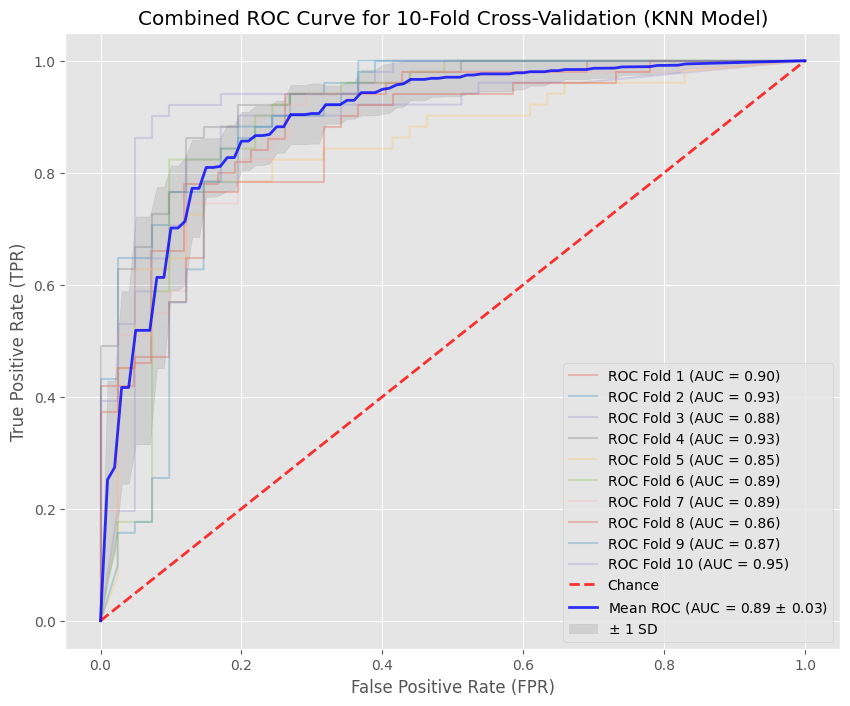


FINAL CROSS-VALIDATION SUMMARY (Class-wise Metrics)
      Accuracy  ROC-AUC  No Disease (P)  No Disease (R)  Heart Disease (P)  Heart Disease (R)  Macro F1
Fold                                                                                                   
1       0.8043   0.9019          0.7857          0.7857             0.8200             0.8200    0.8029
2       0.8370   0.9259          0.8250          0.8049             0.8462             0.8627    0.8346
3       0.8370   0.8800          0.7955          0.8537             0.8750             0.8235    0.8360
4       0.8261   0.9330          0.7551          0.9024             0.9070             0.7647    0.8260
5       0.7826   0.8482          0.7561          0.7561             0.8039             0.8039    0.7800
6       0.8370   0.8934          0.7955          0.8537             0.8750             0.8235    0.8360
7       0.7935   0.8862          0.7292          0.8537             0.8636             0.7451    0.7933
8       0.7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, auc, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualization
plt.style.use('ggplot')

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# [Previous code from step 1, 2, 3 should be placed here to define X, y, and scaler]
# ==============================================================================

# (Replacing the omitted data loading/preprocessing/splitting code block for completeness)
file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

df = df.drop(columns=['id', 'dataset'])
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

for col in categorical_columns:
    if col in df.columns:
        imputed_array = categorical_imputer.fit_transform(df[[col]])
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)

df['rate_pressure_product'] = df['thalch'] * df['trestbps']
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))
df['thalch_age_ratio'] = df['thalch'] / df['age']

high_risk_cp_cols = [col for col in df.columns if col.startswith('cp_') and col not in ['cp_1', 'cp_1.0']]
if high_risk_cp_cols:
    df['is_high_risk_cp'] = df[high_risk_cp_cols].sum(axis=1)
    # print(f"Successfully created 'is_high_risk_cp' using columns: {high_risk_cp_cols}")
else:
    df['is_high_risk_cp'] = 0
    # print("Warning: Could not identify high-risk 'cp' columns for feature engineering. Using placeholder.")

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

feature_columns_updated = [col for col in df.columns if col != 'num']
X = df[feature_columns_updated]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_full_scaled = scaler.fit_transform(X)

# --- Assume best_knn_model parameters are set ---
best_knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1, weights='distance')
best_knn_model.fit(X_train_scaled, y_train_resampled)
# ==============================================================================


# ==============================================================================
# 5. কাস্টম স্ট্যাবিলিটি চেক ও গ্রাফিক্যাল রিপোর্ট (CUSTOM STABILITY CHECK & GRAPHICS)
# ==============================================================================

print("\n" + "=" * 80)
print("CUSTOM STABILITY CHECK (10-Fold CV with Class-wise Metrics)")
print("=" * 80)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []
fold_accuracies = []
fold_roc_aucs = []
fold_count = 0

# Variables for the combined ROC plot
tprs = []
base_fpr = np.linspace(0, 1, 101)
plt.figure(figsize=(10, 8))

# Split the FULL SCALED DATA (X_full_scaled) into 10 folds
for train_index, test_index in skf.split(X_full_scaled, y):
    X_train_fold, X_test_fold = X_full_scaled[train_index], X_full_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    fold_count += 1

    # 1. SMOTE only on the training fold
    smote_fold = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote_fold.fit_resample(X_train_fold, y_train_fold)

    # 2. Re-fit the model on the training fold
    model_clone = KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1, weights='distance')
    model_clone.fit(X_train_fold_resampled, y_train_fold_resampled)

    # 3. Predict and Evaluate on the test fold
    y_pred_fold = model_clone.predict(X_test_fold)
    y_pred_proba_fold = model_clone.predict_proba(X_test_fold)[:, 1]

    # Calculate Metrics
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba_fold)
    report = classification_report(y_test_fold, y_pred_fold,
                                   target_names=['No Disease (0)', 'Heart Disease (1)'],
                                   output_dict=True)

    # --- GRAPHICAL DATA COLLECTION ---
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba_fold)
    tprs.append(np.interp(base_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    plt.plot(fpr, tpr, alpha=0.3, label=f'ROC Fold {fold_count} (AUC = {roc_auc:.2f})')
    # --- END GRAPHICAL DATA COLLECTION ---

    fold_accuracies.append(accuracy)
    fold_roc_aucs.append(roc_auc)

    print(f"\n--- FOLD {fold_count} / 10 ---")
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

    # Print Classification Report (in standard format)
    print(classification_report(y_test_fold, y_pred_fold,
                                target_names=['No Disease (0)', 'Heart Disease (1)']))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_fold, y_pred_fold)}")

    metrics_summary = {
        'Fold': fold_count,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'No Disease (P)': report['No Disease (0)']['precision'],
        'No Disease (R)': report['No Disease (0)']['recall'],
        'Heart Disease (P)': report['Heart Disease (1)']['precision'],
        'Heart Disease (R)': report['Heart Disease (1)']['recall'],
        'Macro F1': report['macro avg']['f1-score']
    }
    cv_results.append(metrics_summary)

# --- FINAL ROC PLOT GENERATION ---
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(base_fpr, mean_tpr)
std_auc = np.std(fold_roc_aucs)
plt.plot(base_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 SD')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Combined ROC Curve for 10-Fold Cross-Validation (KNN Model)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
#

# ==============================================================================
# 6. ফাইনাল সামারি (Final Summary)
# ==============================================================================

final_df = pd.DataFrame(cv_results).set_index('Fold')

print("\n" + "=" * 80)
print("FINAL CROSS-VALIDATION SUMMARY (Class-wise Metrics)")
print("=" * 80)
print(final_df.to_string(float_format='%.4f'))

print("\n--- Summary Statistics ---")
print(f"Mean CV Accuracy:   {np.mean(fold_accuracies):.4f}")
print(f"Std Dev CV Accuracy: {np.std(fold_accuracies):.4f}")
print(f"Mean Heart Disease (P): {final_df['Heart Disease (P)'].mean():.4f}")
print(f"Mean Heart Disease (R): {final_df['Heart Disease (R)'].mean():.4f}")


CUSTOM STABILITY CHECK (10-Fold CV with Individual Graphical Reports)

--- FOLD 1 / 10 ---
Accuracy: 0.8043, ROC-AUC: 0.9019
                   precision    recall  f1-score   support

   No Disease (0)       0.79      0.79      0.79        42
Heart Disease (1)       0.82      0.82      0.82        50

         accuracy                           0.80        92
        macro avg       0.80      0.80      0.80        92
     weighted avg       0.80      0.80      0.80        92



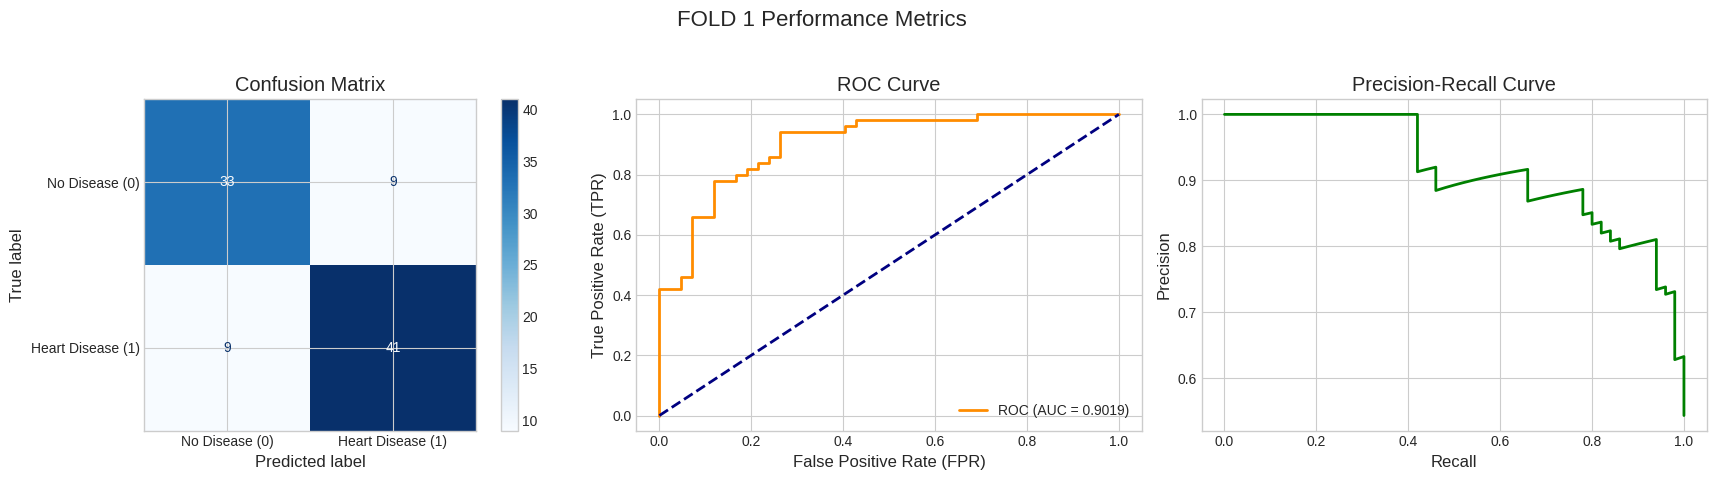


--- FOLD 2 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.9259
                   precision    recall  f1-score   support

   No Disease (0)       0.82      0.80      0.81        41
Heart Disease (1)       0.85      0.86      0.85        51

         accuracy                           0.84        92
        macro avg       0.84      0.83      0.83        92
     weighted avg       0.84      0.84      0.84        92



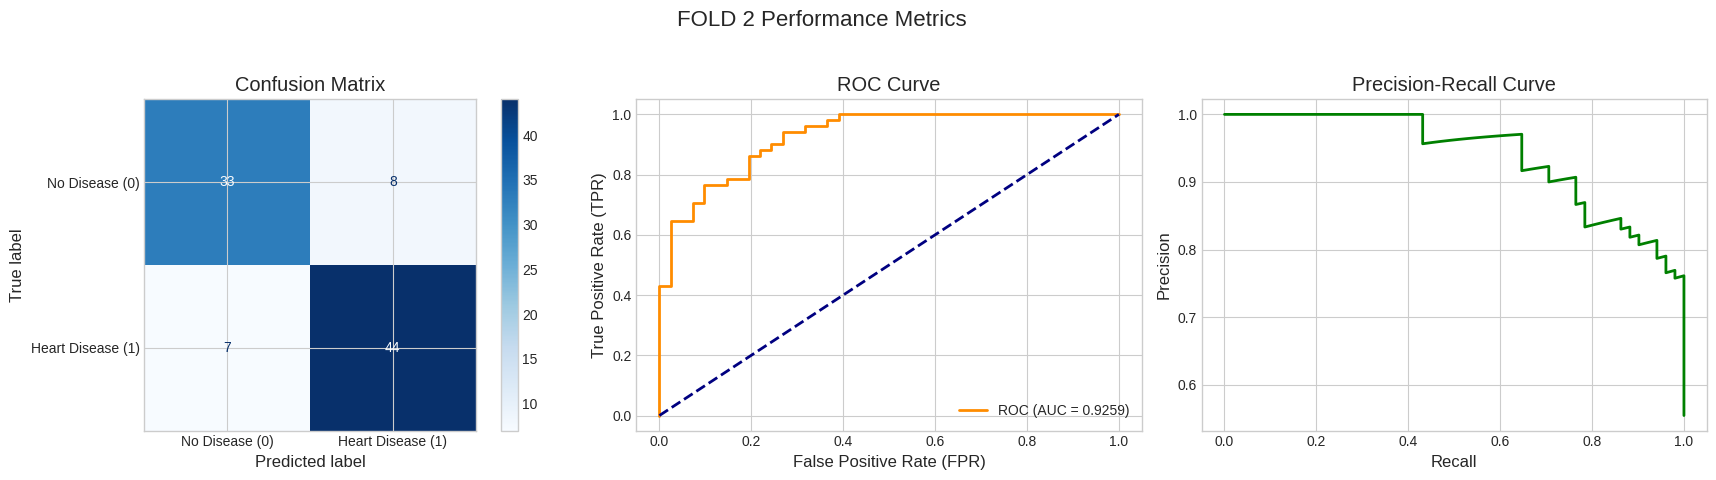


--- FOLD 3 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.8800
                   precision    recall  f1-score   support

   No Disease (0)       0.80      0.85      0.82        41
Heart Disease (1)       0.88      0.82      0.85        51

         accuracy                           0.84        92
        macro avg       0.84      0.84      0.84        92
     weighted avg       0.84      0.84      0.84        92



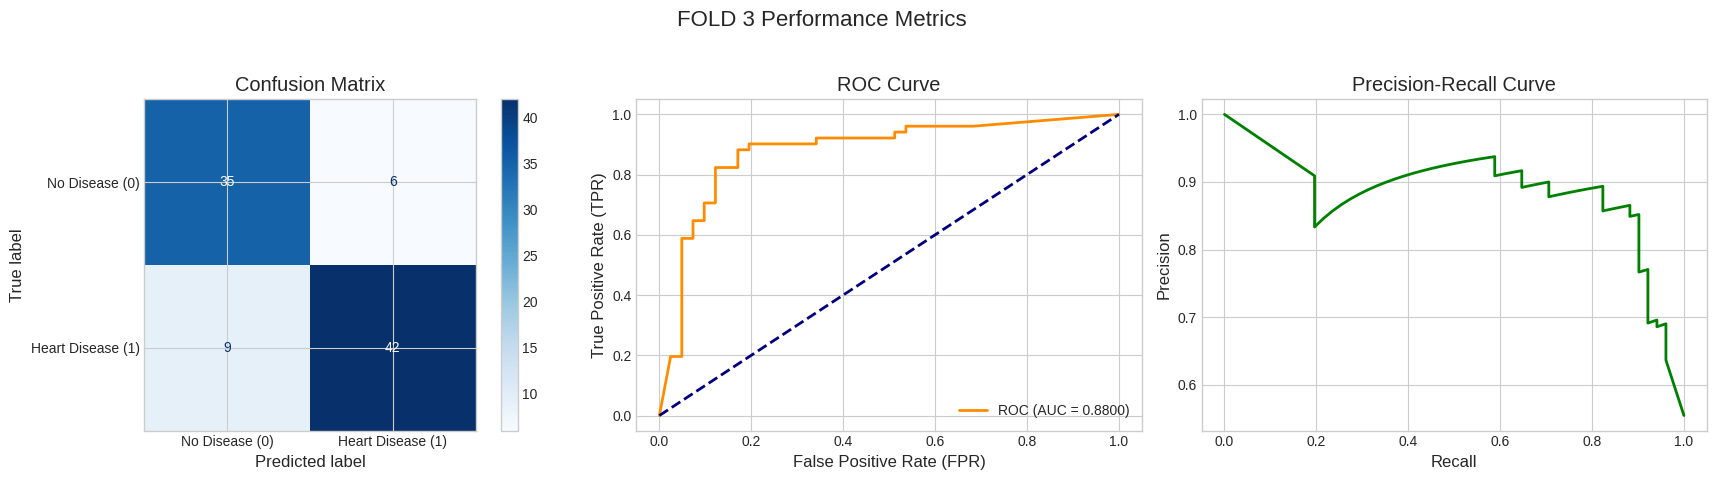


--- FOLD 4 / 10 ---
Accuracy: 0.8261, ROC-AUC: 0.9330
                   precision    recall  f1-score   support

   No Disease (0)       0.76      0.90      0.82        41
Heart Disease (1)       0.91      0.76      0.83        51

         accuracy                           0.83        92
        macro avg       0.83      0.83      0.83        92
     weighted avg       0.84      0.83      0.83        92



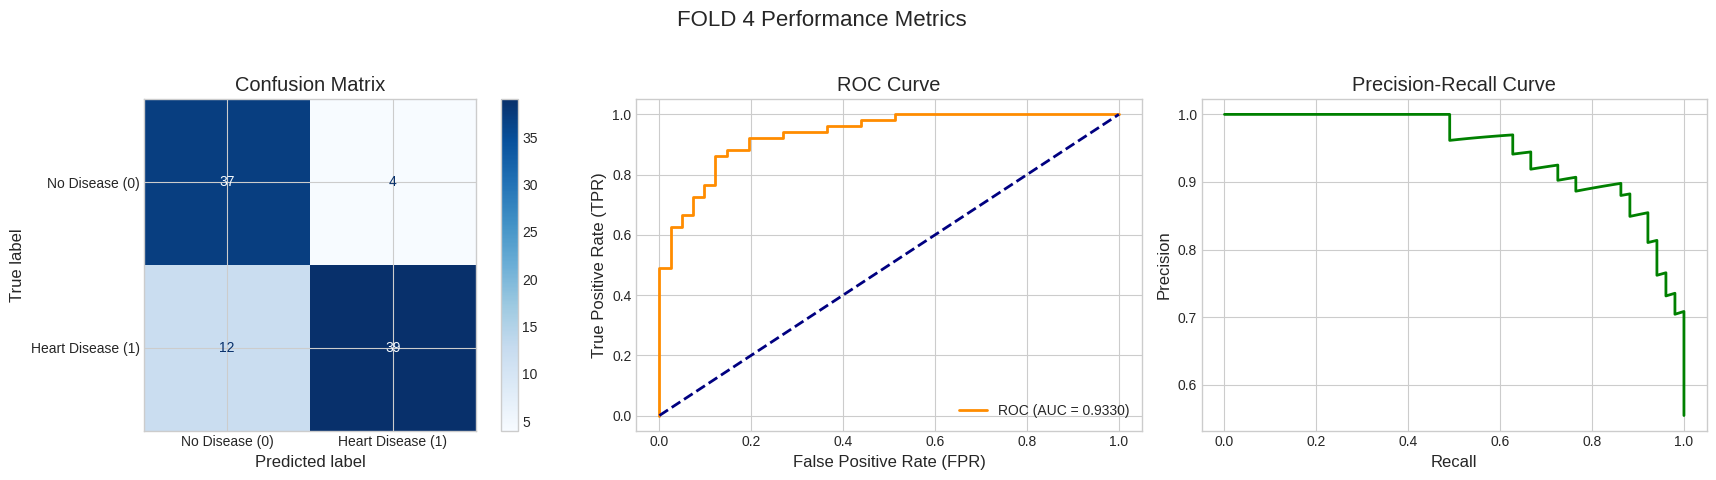


--- FOLD 5 / 10 ---
Accuracy: 0.7826, ROC-AUC: 0.8482
                   precision    recall  f1-score   support

   No Disease (0)       0.76      0.76      0.76        41
Heart Disease (1)       0.80      0.80      0.80        51

         accuracy                           0.78        92
        macro avg       0.78      0.78      0.78        92
     weighted avg       0.78      0.78      0.78        92



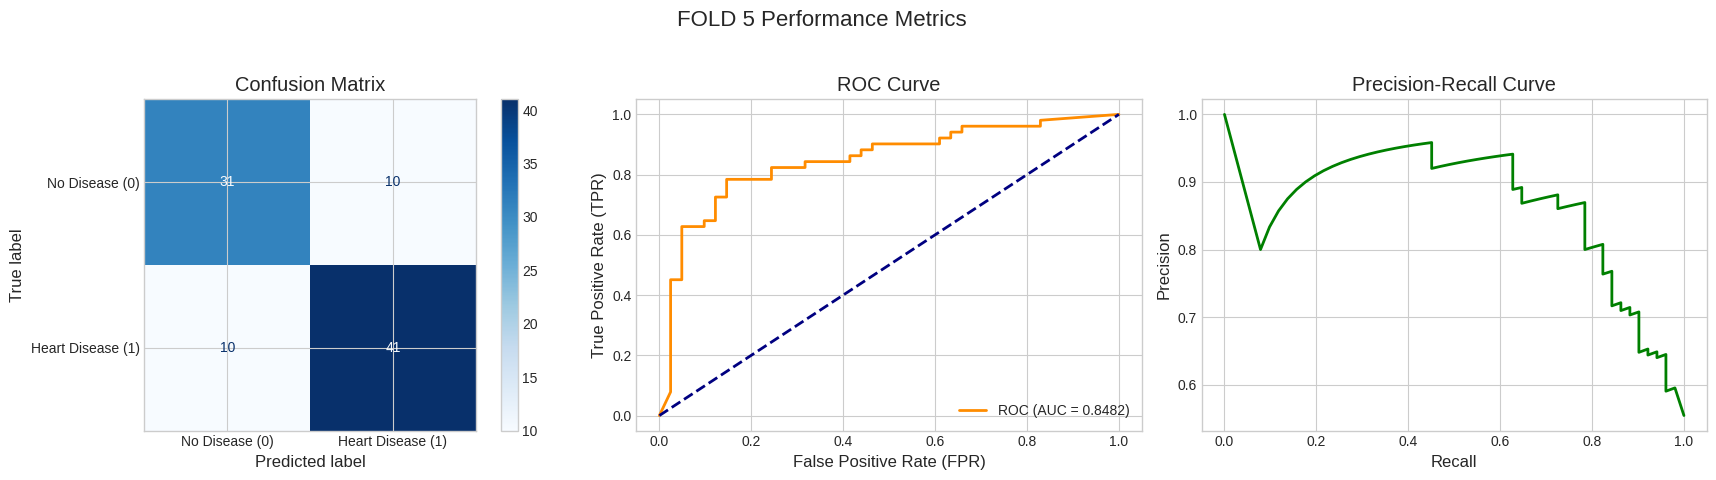


--- FOLD 6 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.8934
                   precision    recall  f1-score   support

   No Disease (0)       0.80      0.85      0.82        41
Heart Disease (1)       0.88      0.82      0.85        51

         accuracy                           0.84        92
        macro avg       0.84      0.84      0.84        92
     weighted avg       0.84      0.84      0.84        92



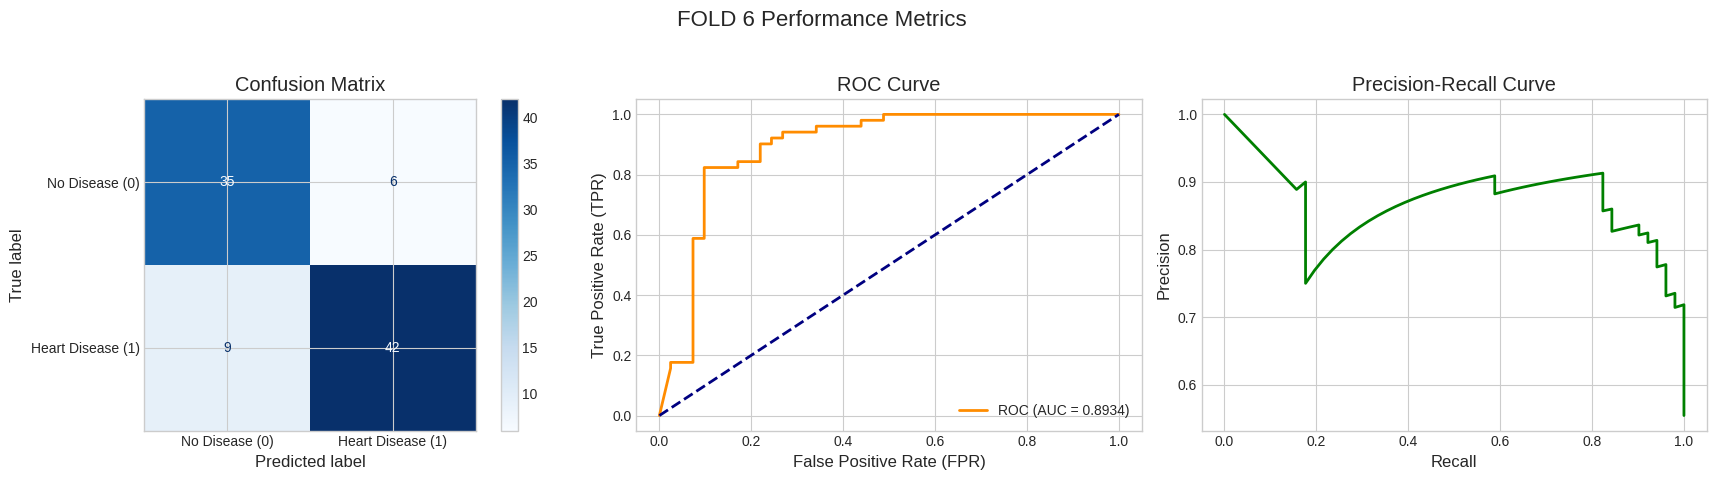


--- FOLD 7 / 10 ---
Accuracy: 0.7935, ROC-AUC: 0.8862
                   precision    recall  f1-score   support

   No Disease (0)       0.73      0.85      0.79        41
Heart Disease (1)       0.86      0.75      0.80        51

         accuracy                           0.79        92
        macro avg       0.80      0.80      0.79        92
     weighted avg       0.80      0.79      0.79        92



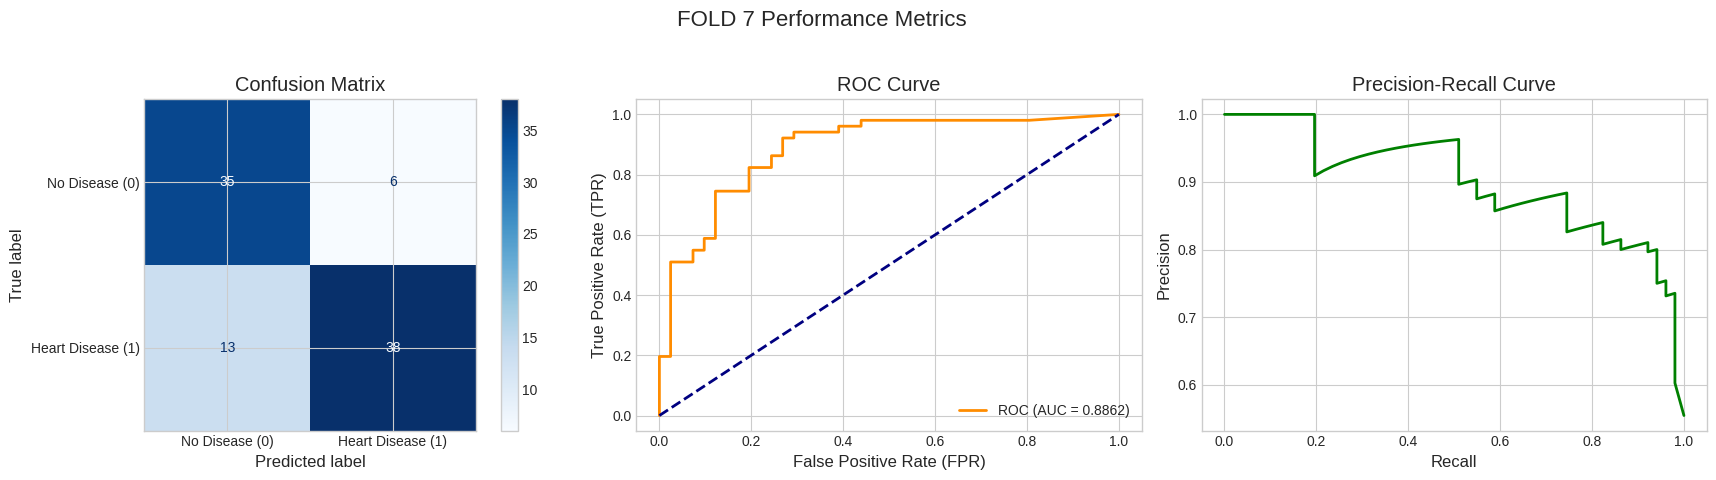


--- FOLD 8 / 10 ---
Accuracy: 0.7935, ROC-AUC: 0.8627
                   precision    recall  f1-score   support

   No Disease (0)       0.75      0.80      0.78        41
Heart Disease (1)       0.83      0.78      0.81        51

         accuracy                           0.79        92
        macro avg       0.79      0.79      0.79        92
     weighted avg       0.80      0.79      0.79        92



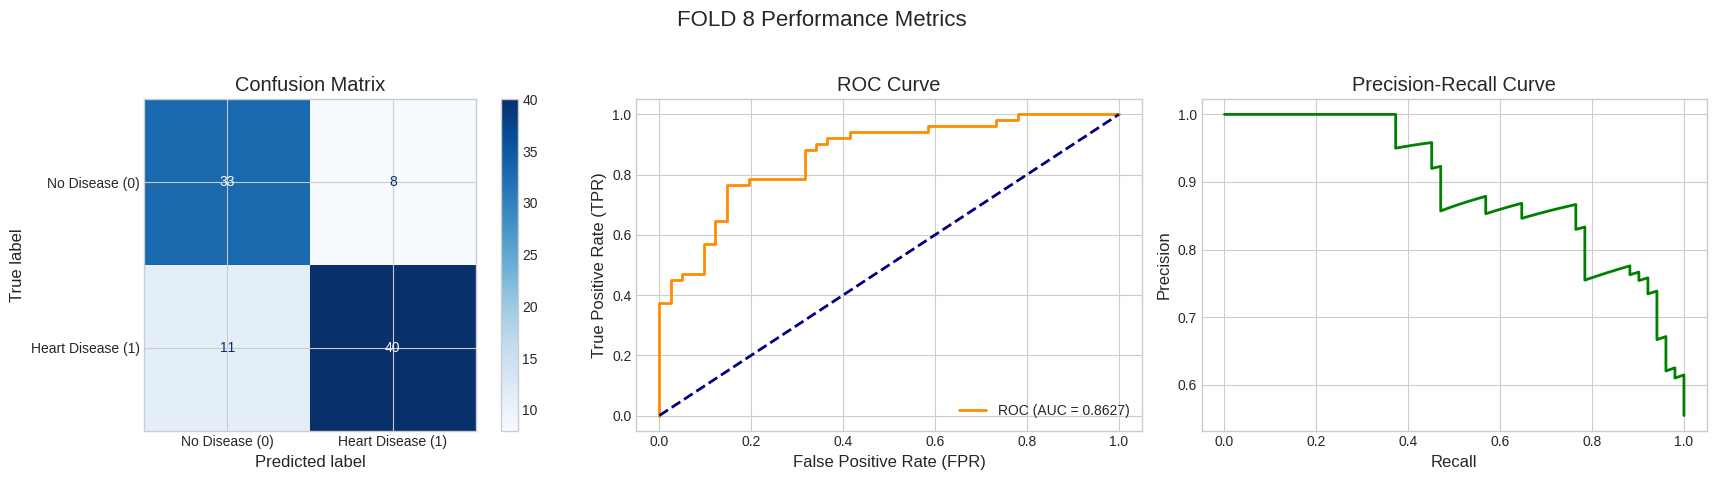


--- FOLD 9 / 10 ---
Accuracy: 0.8370, ROC-AUC: 0.8730
                   precision    recall  f1-score   support

   No Disease (0)       0.86      0.76      0.81        41
Heart Disease (1)       0.82      0.90      0.86        51

         accuracy                           0.84        92
        macro avg       0.84      0.83      0.83        92
     weighted avg       0.84      0.84      0.84        92



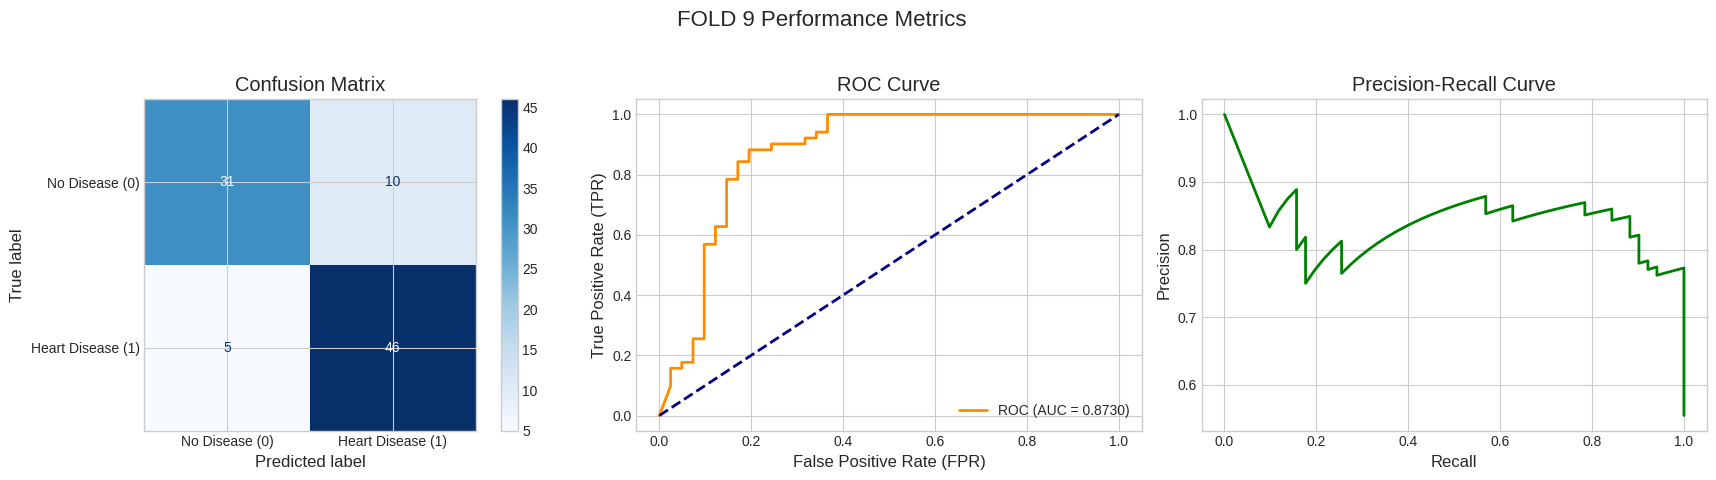


--- FOLD 10 / 10 ---
Accuracy: 0.9022, ROC-AUC: 0.9493
                   precision    recall  f1-score   support

   No Disease (0)       0.85      0.95      0.90        41
Heart Disease (1)       0.96      0.86      0.91        51

         accuracy                           0.90        92
        macro avg       0.90      0.91      0.90        92
     weighted avg       0.91      0.90      0.90        92



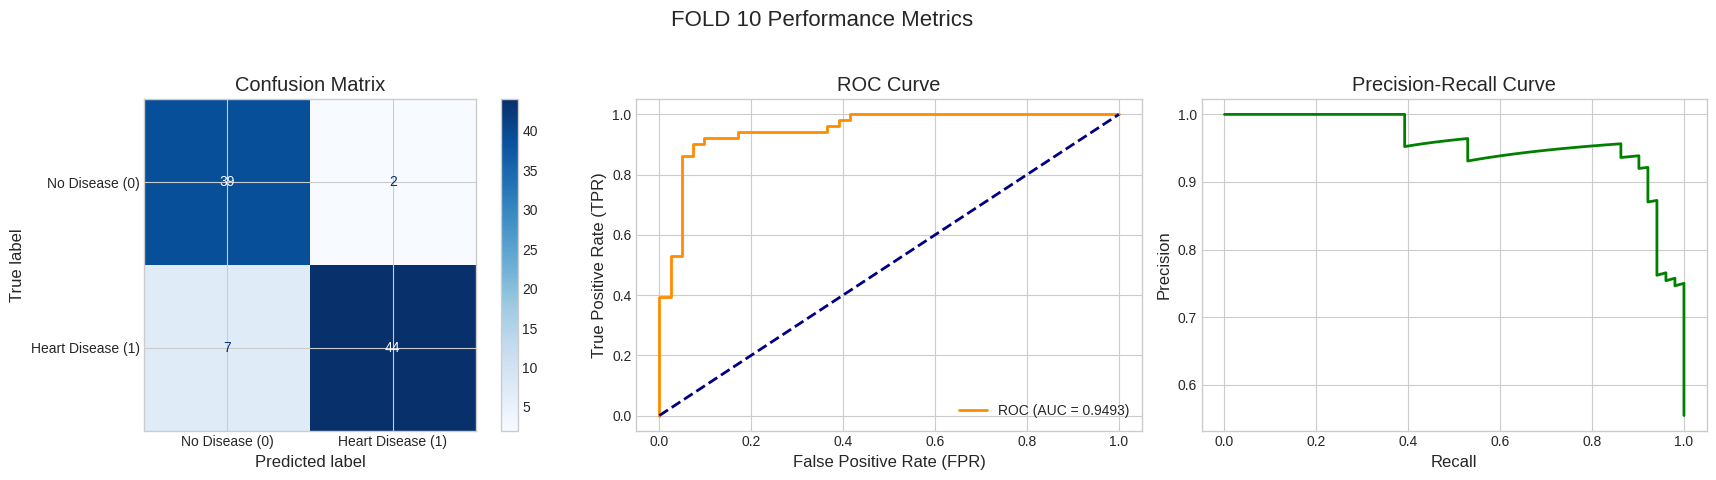


FINAL CROSS-VALIDATION SUMMARY (Class-wise Metrics)
      Accuracy  ROC-AUC  No Disease (P)  No Disease (R)  Heart Disease (P)  Heart Disease (R)  Macro F1
Fold                                                                                                   
1       0.8043   0.9019          0.7857          0.7857             0.8200             0.8200    0.8029
2       0.8370   0.9259          0.8250          0.8049             0.8462             0.8627    0.8346
3       0.8370   0.8800          0.7955          0.8537             0.8750             0.8235    0.8360
4       0.8261   0.9330          0.7551          0.9024             0.9070             0.7647    0.8260
5       0.7826   0.8482          0.7561          0.7561             0.8039             0.8039    0.7800
6       0.8370   0.8934          0.7955          0.8537             0.8750             0.8235    0.8360
7       0.7935   0.8862          0.7292          0.8537             0.8636             0.7451    0.7933
8       0.7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            ConfusionMatrixDisplay)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# ==============================================================================
# 1. ডেটা লোডিং ও প্রি-প্রসেসিং (Data Loading and Pre-processing)
# ==============================================================================

file_path = '/content/heart_disease_uci.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the dataset is uploaded.")
    exit()

df = df.drop(columns=['id', 'dataset'])
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')
categorical_columns = ['fbs', 'exang', 'ca', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df = df.replace('?', np.nan)
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

for col in categorical_columns:
    if col in df.columns:
        imputed_array = categorical_imputer.fit_transform(df[[col]])
        df[col] = pd.Series(imputed_array.ravel(), index=df.index).astype(object)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

df = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope'], drop_first=True)

# Feature Engineering
df['rate_pressure_product'] = df['thalch'] * df['trestbps']
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)
df['log_oldpeak'] = np.log1p(df['oldpeak'].clip(lower=0))
df['thalch_age_ratio'] = df['thalch'] / df['age']

high_risk_cp_cols = [col for col in df.columns if col.startswith('cp_') and col not in ['cp_1', 'cp_1.0']]
if high_risk_cp_cols:
    df['is_high_risk_cp'] = df[high_risk_cp_cols].sum(axis=1)
else:
    df['is_high_risk_cp'] = 0

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

feature_columns_updated = [col for col in df.columns if col != 'num']
X = df[feature_columns_updated]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_full_scaled = scaler.fit_transform(X)

# --- Best KNN Model Parameters (from previous successful tuning) ---
best_knn_model_params = {'metric': 'manhattan', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
# ==============================================================================


# ==============================================================================
# 5. কাস্টম স্ট্যাবিলিটি চেক ও গ্রাফিক্যাল রিপোর্ট (CUSTOM STABILITY CHECK & GRAPHICS)
# ==============================================================================

print("\n" + "=" * 80)
print("CUSTOM STABILITY CHECK (10-Fold CV with Individual Graphical Reports)")
print("=" * 80)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []
fold_count = 0
target_names = ['No Disease (0)', 'Heart Disease (1)']

# Split the FULL SCALED DATA (X_full_scaled) into 10 folds
for train_index, test_index in skf.split(X_full_scaled, y):
    X_train_fold, X_test_fold = X_full_scaled[train_index], X_full_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    fold_count += 1

    # 1. SMOTE only on the training fold
    smote_fold = SMOTE(random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote_fold.fit_resample(X_train_fold, y_train_fold)

    # 2. Re-fit the model on the training fold using best parameters
    model_clone = KNeighborsClassifier(**best_knn_model_params)
    model_clone.fit(X_train_fold_resampled, y_train_fold_resampled)

    # 3. Predict and Evaluate on the test fold
    y_pred_fold = model_clone.predict(X_test_fold)
    y_pred_proba_fold = model_clone.predict_proba(X_test_fold)[:, 1]

    # Calculate Metrics
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_pred_proba_fold)

    print(f"\n--- FOLD {fold_count} / 10 ---")
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")

    # Numerical Report
    report = classification_report(y_test_fold, y_pred_fold, target_names=target_names, output_dict=True)
    print(classification_report(y_test_fold, y_pred_fold, target_names=target_names))


    # --- GRAPHICAL REPORTING FOR EACH FOLD ---

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'FOLD {fold_count} Performance Metrics', fontsize=16)

    # 1. Confusion Matrix Plot
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues, ax=axes[0], values_format='d')
    axes[0].set_title('Confusion Matrix')
    #  (This visual instruction will be triggered 10 times)

    # 2. ROC Curve Plot
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_proba_fold)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.4f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlabel('False Positive Rate (FPR)')
    axes[1].set_ylabel('True Positive Rate (TPR)')
    axes[1].set_title('ROC Curve')
    axes[1].legend(loc="lower right")
    #  (This visual instruction will be triggered 10 times)

    # 3. Precision-Recall Curve Plot
    precision, recall, _ = precision_recall_curve(y_test_fold, y_pred_proba_fold)
    axes[2].plot(recall, precision, color='green', lw=2)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    #  (This visual instruction will be triggered 10 times)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    # --- END GRAPHICAL REPORTING FOR EACH FOLD ---

    metrics_summary = {
        'Fold': fold_count,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc,
        'No Disease (P)': report['No Disease (0)']['precision'],
        'No Disease (R)': report['No Disease (0)']['recall'],
        'Heart Disease (P)': report['Heart Disease (1)']['precision'],
        'Heart Disease (R)': report['Heart Disease (1)']['recall'],
        'Macro F1': report['macro avg']['f1-score']
    }
    cv_results.append(metrics_summary)

# ==============================================================================
# 6. ফাইনাল সামারি (Final Summary)
# ==============================================================================

final_df = pd.DataFrame(cv_results).set_index('Fold')

print("\n" + "=" * 80)
print("FINAL CROSS-VALIDATION SUMMARY (Class-wise Metrics)")
print("=" * 80)
print(final_df.to_string(float_format='%.4f'))

print("\n--- Summary Statistics ---")
print(f"Mean CV Accuracy:   {final_df['Accuracy'].mean():.4f}")
print(f"Std Dev CV Accuracy: {final_df['Accuracy'].std():.4f}")
print(f"Mean Heart Disease (P): {final_df['Heart Disease (P)'].mean():.4f}")
print(f"Mean Heart Disease (R): {final_df['Heart Disease (R)'].mean():.4f}")